# Dimensionality reduction

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 6

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
import pickle

%matplotlib inline

## Toy dataset for debugging

Write a function that generates data from two Gaussians with unit variance, centered at $\mathbf{1}$ and $-\mathbf{1}$ respectively. $\mathbf{1}$ is the vector of all ones.

Use the function to generate 100 samples from each Gaussian, with a 5 dimensional feature space.

In [2]:
# Solution goes here
nFeature = 5
m1 = [1]*nFeature
m2 = [-1]*nFeature
s = np.diag([1]*nFeature)
data1 = np.random.multivariate_normal(m1, s,[100])
data2 = np.random.multivariate_normal(m2, s,[100])

## Principal component analysis (PCA)

The **Singular Values** of a square matrix $A$ is defined as the square root of the eigenvalues of $A^T A$. Given a matrix $X$, the singular value decomposition (SVD) is given by
$$
X = U S V^T
$$
where $U$ and $V$ are orthogonal matrices containing the left and right singular vectors respectively. And $S$ is a matrix with the singular values along the diagonal.

Recall that PCA considers the covariance matrix of a data matrix $X$. Using the definition of SVD above, derive expressions for:
1. the eigenvectors
2. the projection of $X$ onto the $k$ largest eigenvalues


### Solution description

$$
X^T X = (U S V^T)^T U S V^T = VS^T S V^T \\
X^T X V = (U S V^T)^T U S V^T = VS^T S \\
$$
eigenvectors : each column of V.
project of X onto the k largest eignvalues is the k eigenvectors corresponding to the k largest eigenvalues.

## Implement PCA

Implement the principal component analysis method, using ```numpy.linalg.svd```. Your function should take the data matrix and return two matrices:
1. The projection of the data onto the principal components
2. The actual components (eigenvectors) themselves.

*Hint: do not forget to center the data by removing the mean*

In [10]:
# Solution goes here

def PCA(data):
    data = data - np.mean(data)
    C = data.T.dot(data)/len(data)
    U,S,V = np.linalg.svd(C)
    proj = data.dot(U)
    return(proj, U)

# Test


Obtain the projection of the toy data above to its first two principal components. Plot the results. You should be able to see that the first principal component already gives you the axis of discrimination.

[ 1.39774378  1.18853429  0.91267436  0.80734598  0.71331469]


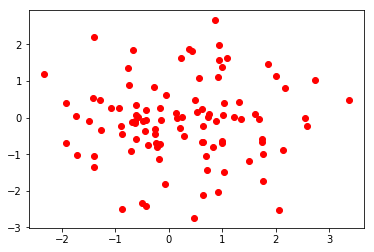

In [4]:
# Solution goes here
proj, U = PCA(data1)
plt.plot(proj[:,0],proj[:,1],'ro')

## The classification data set

*You have seen this dataset in earlier tutorials*

We will predict the incidence of diabetes based on various measurements (see [description](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)). Instead of directly using the raw data, we use a normalised version, where the label to be predicted (the incidence of diabetes) is in the first column. Download the data from [mldata.org](http://mldata.org/repository/data/download/csv/diabetes_scale/).

Read in the data using pandas.

In [57]:
names = ['diabetes', 'num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age']
data = pd.read_csv('diabetes_scale.csv', header=None, names=names)
data.diabetes.replace(-1, 0, inplace=True) # replace -1 with 0 because we need labels to be in {0, 1}
data.head()

,diabetes,num preg,plasma,bp,skin fold,insulin,bmi,pedigree,age
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


Find the first two principal components of the features in the classification data set. Plot the scatter plot showing the examples projected onto the first two principal components. Use the labels to produce different symbols for each class. Discuss whether the first two principal components discriminate well.

## (optional) Effect of normalisation on principal components

Plot the scatter plot of the first two principal components of the classification dataset respectively before and after the normalisations in Tutorial 2 and 5.

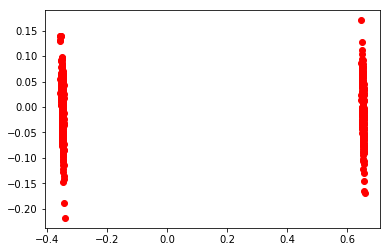

In [30]:
# Solution goes here
m = np.mean(data.iloc[:,1:])
data.iloc[:,1:] = data.iloc[:,1:] - m
s = np.sqrt(np.sum(data.iloc[:,1:]*data.iloc[:,1:]))
data.iloc[:,1:] = data.iloc[:,1:]/s
proj, U = PCA(data)
plt.plot(proj[0],proj[1],'ro')

## Using principal components as features for classification

Write a file containing the features projected onto the first 4 principal components, using the ```to_csv``` command of ```pandas```.

In [61]:
# Solution goes here
# proj, U = PCA(data)
# pj = pd.DataFrame(proj.iloc[:,:4])
# pj.columns = ['F1','F2','F3','F4']
# pj['label'] = data['diabetes']
pj.to_csv('prin_feat4.csv',index=False)

In [62]:
# Data should look something like the below
data = pd.read_csv('prin_feat4.csv')
data.head()

,F1,F2,F3,F4,label
0,0.909544,0.012227,0.007445,-0.044400,0
1,-0.575757,-0.047151,-0.073304,-0.030430,1
2,0.765963,-0.072397,0.612666,0.071707,0
3,-0.707183,0.115886,0.000505,-0.057126,1
4,0.447273,1.077020,0.159014,-0.211261,0


Use the first four principal components with your logistic regression code from Tutorial 3, and compare the results. For simplicity, compare the training error.

In [75]:
# Solution goes here
# Solution goes here
# scipy.optimize.fmin_bfgs
# fmin_bfgs
def sigmoid(x):
    return(1/(1+np.exp(-x)))

def phi(x):
    return(x)

def predict(w,x):
    return(sigmoid(phi(x).dot(w)))

def cost(w,x,t):
    return(-(t.T.dot(np.log(predict(w,x))) + (1-t).T.dot(np.log(predict(w,-x)))))

def grad(w,x,t):
    return((predict(w,x)-t).T.dot(phi(x)))


def train(x,t):
    w = np.ones(x.shape[1])*1e-8
    w = opt.fmin_bfgs(cost, x0 = w, fprime = grad, args = (x,t))
    return(w)
    

def test(w,x,t):
    print(cost(w,x,t))
    return(predict(x,w))

# Test
# x = data[:,1:]
# t = data[:,0]
# t = t>0

# n = len(x)
# train_x = x[:n/2,:]
# train_y = t[:n/2]
# test_x = x[n/2:,:]
# test_y = t[n/2:]
x = data.iloc[:10,0:4].as_matrix()
y = data.iloc[:10,4].as_matrix()
w = np.ones(x.shape[1])*1e-8
cost(w,x,y)
w = train(x,y)
# pred_y = test(w,test_x,test_y)

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20


In [ ]:
# Solution goes here

## (optional) Explore noisy features

Use ```numpy.random.randn``` to generate 20 random features and add them to the diabetes dataset. How does logistic regression perform on all features? Can PCA be used to identify the signal?

In [ ]:
# Solution goes here

## Eigenfaces

The aim of this section of the tutorial is to see that in some cases, the principal components can be human interpretable.

The images below are of Colin Powell, resized to a smaller image, from [LFW](http://vis-www.cs.umass.edu/lfw/). Download the images from [the course website](https://machlearn.gitlab.io/isml2017/tutorial/lfw_colin.pkl).

In [ ]:
# Visualising images
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



In [ ]:
lfw_colin = pickle.load(open('lfw_colin.pkl', 'rb'))

# introspect the images array to find the shapes (for plotting)
n_samples, h, w = lfw_colin['images'].shape
plot_gallery(lfw_colin['images'], range(n_samples), h, w)


Use the ```pca``` function you wrote above to find the first 15 principal components. Visualise them. Discuss what the components potentially capture, for example lighting from the right.

*Hint: Images need to be converted into a vector for PCA, and the results need to be converted back*

In [ ]:
# Solution goes here